<a href="https://colab.research.google.com/github/Uma-kanagarajan/Rock-Paper-Scissors/blob/main/TFP_Rock_Paper_Scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# rps training set
!gdown --id 1DYVMuV2I_fA6A3er-mgTavrzKuxwpvKV
  
# rps testing set
!gdown --id 1RaodrRK1K03J_dGiLu8raeUynwmIbUaM

Downloading...
From: https://drive.google.com/uc?id=1DYVMuV2I_fA6A3er-mgTavrzKuxwpvKV
To: /content/rps.zip
100% 201M/201M [00:02<00:00, 96.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RaodrRK1K03J_dGiLu8raeUynwmIbUaM
To: /content/rps-test-set.zip
100% 29.5M/29.5M [00:00<00:00, 94.0MB/s]


In [ ]:
import os
import zipfile

local_ref = './rps.zip'
zip_ref = zipfile.ZipFile(local_ref, 'r')
zip_ref.extractall('/content/rps-train')
zip_ref.close()

local_ref = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_ref, 'r')
zip_ref.extractall('/content/rps-test')
zip_ref.close()

In [ ]:
base_dir = ('/content/rps-train/rps')

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissor_dir = os.path.join(base_dir, 'scissors')

print("total training rock images", len(os.listdir(rock_dir)))
print("total training paper images", len(os.listdir(paper_dir)))
print("total training scissors images", len(os.listdir(scissor_dir)))

total training rock images 840
total training paper images 840
total training scissors images 840


In [ ]:
rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissor_files = os.listdir(scissor_dir)
print(scissor_files[:10])

['rock04-085.png', 'rock01-102.png', 'rock03-118.png', 'rock03-041.png', 'rock06ck02-104.png', 'rock01-044.png', 'rock04-009.png', 'rock05ck01-114.png', 'rock01-038.png', 'rock03-018.png']
['paper02-043.png', 'paper06-003.png', 'paper04-042.png', 'paper03-051.png', 'paper05-117.png', 'paper07-101.png', 'paper05-066.png', 'paper01-038.png', 'paper07-076.png', 'paper05-095.png']
['scissors01-084.png', 'scissors03-059.png', 'scissors02-058.png', 'testscissors03-079.png', 'scissors04-065.png', 'scissors01-050.png', 'scissors03-106.png', 'scissors02-005.png', 'scissors01-064.png', 'testscissors01-109.png']


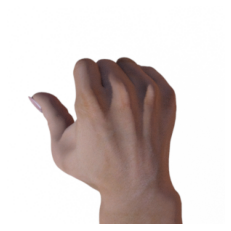

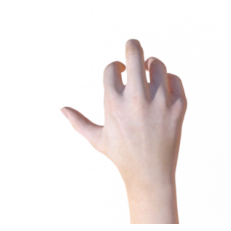

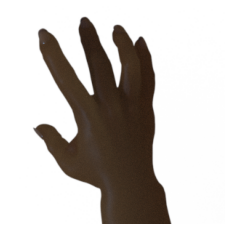

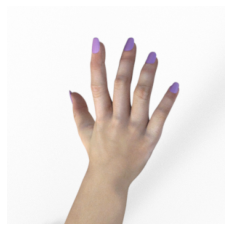

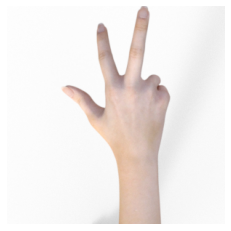

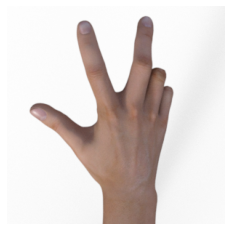

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissor_dir, fname) 
                for fname in scissor_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import keras.preprocessing
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

training_dir = '/content/rps-train/rps'
training_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range =40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

validation_dir = '/content/rps-test/rps-test-set'
validation_datagen = ImageDataGenerator(rescale=1/255)

training_generator = training_datagen.flow_from_directory(
    training_dir,
    target_size=(150, 150),
  class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
  class_mode='categorical',
  batch_size=126
)


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(64, (3,3), activation='relu',
                                 input_shape=(150, 150, 3)),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512, activation='relu'),
          tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_generator,
                    epochs=30,
                    steps_per_epoch=20,
                    validation_data = validation_generator,
                    validation_steps=3,
                    verbose=1)

model.save("rps.h5")

Epoch 1/30
20/20 [==============================] - 177s 9s/step - loss: 1.6872 - accuracy: 0.3488 - val_loss: 1.0895 - val_accuracy: 0.3333
Epoch 2/30
20/20 [==============================] - 176s 9s/step - loss: 1.0795 - accuracy: 0.4206 - val_loss: 1.0680 - val_accuracy: 0.5081
Epoch 3/30
20/20 [==============================] - 180s 9s/step - loss: 1.4015 - accuracy: 0.5123 - val_loss: 0.9209 - val_accuracy: 0.8199
Epoch 4/30
20/20 [==============================] - 180s 9s/step - loss: 0.9095 - accuracy: 0.5758 - val_loss: 0.8424 - val_accuracy: 0.5188
Epoch 5/30
20/20 [==============================] - 179s 9s/step - loss: 0.8383 - accuracy: 0.6440 - val_loss: 1.0568 - val_accuracy: 0.6667
Epoch 6/30
20/20 [==============================] - 179s 9s/step - loss: 0.7878 - accuracy: 0.6282 - val_loss: 0.2172 - val_accuracy: 0.9839
Epoch 7/30
20/20 [==============================] - 178s 9s/step - loss: 0.6773 - accuracy: 0.7135 - val_loss: 0.1534 - val_accuracy: 1.0000
Epoch 8/30
20

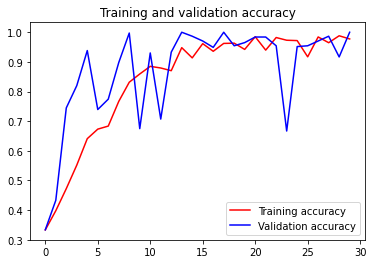

<Figure size 432x288 with 0 Axes>

In [ ]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()